In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import shapiro
from scipy.stats import lognorm
from scipy.stats.stats import pearsonr
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:

path = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\preprocessed_df.csv"
total_df = pd.read_csv(path)

path1 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\descriptive_table.csv"
descript = pd.read_csv(path1)

path2 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\emt12.csv"
emt12_df = pd.read_csv(path2)

path3 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\emt34.csv"
emt34_df = pd.read_csv(path3)

path4 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\emt1.csv"
emt1_df = pd.read_csv(path4)

path5 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\cup12.csv"
cup12_df = pd.read_csv(path5)

path6 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\cup34.csv"
cup34_df = pd.read_csv(path6)

path7 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\cup1.csv"
cup1_df = pd.read_csv(path7)

path8 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\con12.csv"
con12_df = pd.read_csv(path8)

path9 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\con34.csv"
con34_df = pd.read_csv(path9)

path10 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\con1.csv"
con1_df = pd.read_csv(path10)

path11 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\rom142.csv"
rom142_df = pd.read_csv(path11)

path12 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\rom143.csv"
rom143_df = pd.read_csv(path12)

path13 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\rom122.csv"
rom122_df = pd.read_csv(path13)

path14 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\rom123.csv"
rom123_df = pd.read_csv(path14)

path15 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\wir4.csv"
wir4_df = pd.read_csv(path15)

path16 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\wir6.csv"
wir6_df = pd.read_csv(path16)

path17 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\AlexeiDataFrames\\wir10.csv"
wir10_df = pd.read_csv(path17)

<AxesSubplot:ylabel='Frequency'>

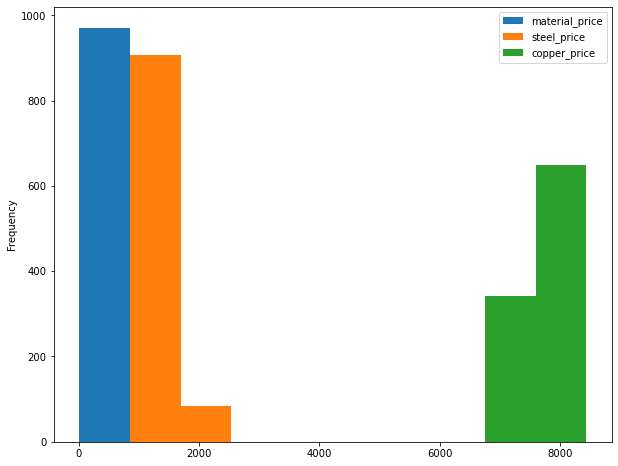

In [3]:
total_df.plot.hist(by=["material_price"], figsize=(10, 8))

In [4]:
# s_result_wir10[1]
s_result_emt12 = shapiro(emt12_df['material_price'])
s_result_emt34 = shapiro(emt34_df['material_price'])
s_result_emt1 = shapiro(emt1_df['material_price'])
s_result_cup12 = shapiro(cup12_df['material_price'])
s_result_cup34 = shapiro(cup34_df['material_price'])
s_result_cup1 = shapiro(cup1_df['material_price'])
s_result_con12 = shapiro(con12_df['material_price'])
s_result_con34 = shapiro(con34_df['material_price'])
s_result_con1 = shapiro(con1_df['material_price'])
s_result_rom142 = shapiro(rom142_df['material_price'])
s_result_rom143 = shapiro(rom143_df['material_price'])
s_result_rom122 = shapiro(rom122_df['material_price'])
s_result_rom123 = shapiro(rom123_df['material_price'])
s_result_wir4 = shapiro(wir4_df['material_price'])
s_result_wir6 = shapiro(wir6_df['material_price'])
s_result_wir10 = shapiro(wir10_df['material_price'])
s_result_total = shapiro(total_df['material_price'])

shapiro_t = []

Shapiro = [s_result_emt12,
s_result_emt34,
s_result_emt1,
s_result_cup12,
s_result_cup34,
s_result_cup1,
s_result_con12,
s_result_con34,
s_result_con1,
s_result_rom142,
s_result_rom143,
s_result_rom122,
s_result_rom123,
s_result_wir4,
s_result_wir6,
s_result_wir10,
s_result_total]

for s in Shapiro:
    results = {'statistic': s[0], 'pvalue': s[1]}
    shapiro_t.append(results)
mat_name = ['emt12',
'emt34',
'emt1',
'cup12',
'cup34',
'cup1',
'con12',
'con34',
'con1',
'rom142',
'rom143',
'rom122',
'rom123',
'wir4',
'wir6',
'wir10',
'total']


shapiro_table = pd.DataFrame(shapiro_t)
shapiro_table['material'] = mat_name
shapiro_table = shapiro_table.iloc[:,[2,0,1]]
shapiro_table

,material,statistic,pvalue
0,emt12,0.172286,2.012851e-19
1,emt34,0.461927,4.117988e-15
2,emt1,0.889278,6.252679e-05
3,cup12,0.193385,2.288629e-15
4,cup34,0.659091,3.389167e-11
5,cup1,0.462875,3.859611e-08
6,con12,0.188530,4.149739e-16
7,con34,0.626853,1.829149e-10
8,con1,0.235543,5.601607e-10
9,rom142,0.607367,9.791068e-14


<AxesSubplot:ylabel='Frequency'>

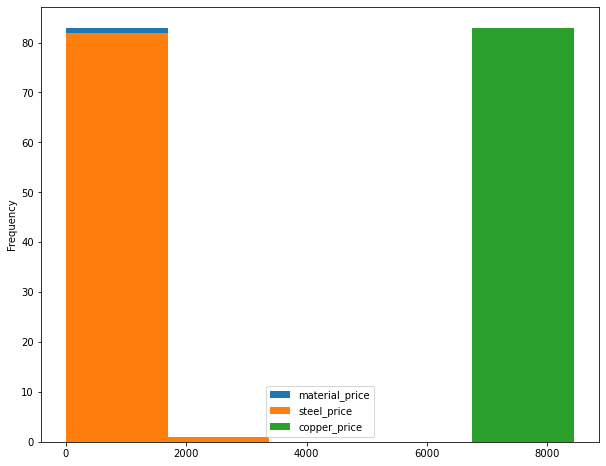

In [5]:
emt12_df.plot.hist(by=["material_price"], bins=5, figsize=(10, 8))

<AxesSubplot:ylabel='Density'>

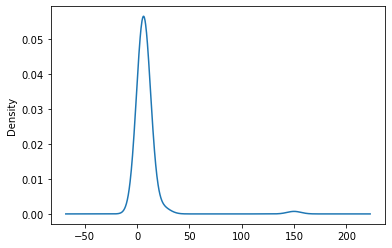

In [6]:
emt12_df["material_price"].plot(kind='kde')

In [7]:
emt12 = emt12_df['material_price']
emt34 = emt34_df['material_price']
emt1 = emt1_df['material_price']
cup12 = cup12_df['material_price']
cup34 = cup34_df['material_price']
cup1 = cup1_df['material_price']
con12 = con12_df['material_price']
con34 = con34_df['material_price']
con1 = con1_df['material_price']
rom142 = rom142_df['material_price']
rom143 = rom143_df['material_price']
rom122 = rom122_df['material_price']
rom123 = rom123_df['material_price']
wir4 = wir4_df['material_price']
wir6 = wir6_df['material_price']
wir10 = wir10_df['material_price']
total = total_df['material_price']

In [8]:
# Correlation between emt and couplings

print([pearsonr(descript['emt12'], descript['cup12']),
pearsonr(descript['emt34'], descript['cup34']),
pearsonr(descript['emt1'], descript['cup1'])])

[(0.9791538374857033, 2.229479351320357e-05), (0.519267428003853, 0.18723428706114928), (0.9275446767944527, 0.0009000087483013352)]


In [9]:
# Correlation between emt and connectors

print([pearsonr(descript['emt12'], descript['con12']),
pearsonr(descript['emt34'], descript['con34']),
pearsonr(descript['emt1'], descript['con1'])])

[(0.9854357535866829, 7.639203081802056e-06), (0.7117093745802325, 0.047695821697207874), (0.8643495262386053, 0.0056226298538448434)]


In [10]:
# Correlation between wire

print([pearsonr(descript['wir4'], descript['wir6']),
pearsonr(descript['wir6'], descript['wir10']),
pearsonr(descript['wir10'], descript['wir4'])])

[(0.7854171581165683, 0.020896801361730617), (0.9950755175340285, 2.9745166521891134e-07), (0.7866675055613015, 0.02055445016313195)]


In [11]:
# Correlation between romex

print([pearsonr(descript['rom142'], descript['rom143']),
pearsonr(descript['rom122'], descript['rom123'])])

[(0.830150983162975, 0.01074234926522521), (0.9025944924581133, 0.0021449205019151555)]


In [12]:
total_df.head()

,material_description,vendor,material_price,link,dow,location,zip,region,date,raw_material,steel_price,copper_price,target_price
0,250 ft. 14/2 Romex SIMpull Solid NM-B W/G Wire,ebay,111.07,https://www.ebay.com/itm/363478081520,Saturday,"2025 Hamilton Avenue. San Jose, California, 95125",95125,west,2022-11-05,copper,1600.95,7953.85,about average
1,3/4 in. x 10 ft. Electric Metallic Tube (EMT) ...,amazon,98.99,https://www.amazon.com/EMT-Conduit-10-ft-Steel...,Saturday,"410 Terry Ave N. Seattle, WA, 98109",98109,west,2022-11-05,steel,1600.95,7953.85,high price
2,1/2 in. Electrical Metallic Tube (EMT) Set-Scr...,lowes,5.99,https://www.lowes.com/pd/Sigma-Electric-ProCon...,Saturday,"1000 Lowe's Blvd. Mooresville, NC, 28117",28117,east,2022-11-05,steel,1600.95,7953.85,high price
3,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,gordonelectricsupply,4.86,https://www.gordonelectricsupply.com/p/Allied-...,Saturday,"1290 N Hobbie Ave. Kankakee, Illinois, 60901",60901,central,2022-11-05,steel,1600.95,7953.85,low price
4,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,homedepot,7.22,https://www.homedepot.com/p/1-2-in-x-10-ft-Ele...,Saturday,"2455 Paces Ferry Rd SE. Atlanta, GA, 30339",30339,southeast,2022-11-05,steel,1600.95,7953.85,high price


In [13]:
# Create Encoding

le = LabelEncoder()
encoded_df = total_df
encoded_df['vendor'] = le.fit_transform(total_df['vendor'])
encoded_df['dow'] = le.fit_transform(total_df['dow'])
encoded_df['region'] = le.fit_transform(total_df['region'])
encoded_df['target_price'] = le.fit_transform(total_df['target_price'])
encoded_df['material_description'] = le.fit_transform(total_df['material_description'])
encoded_df['date'] = le.fit_transform(total_df['date'])
encoded_df['raw_material'] = le.fit_transform(total_df['target_price'])
encoded_df['steel_price'] = le.fit_transform(total_df['material_description'])
encoded_df['copper_price'] = le.fit_transform(total_df['date'])
encoded_df = encoded_df.drop(columns=["location", "zip"])
encoded_df.head()

,material_description,vendor,material_price,link,dow,region,date,raw_material,steel_price,copper_price,target_price
0,8,9,111.07,https://www.ebay.com/itm/363478081520,2,8,13,0,8,13,0
1,13,0,98.99,https://www.amazon.com/EMT-Conduit-10-ft-Steel...,2,8,13,1,13,13,1
2,4,15,5.99,https://www.lowes.com/pd/Sigma-Electric-ProCon...,2,1,13,1,4,13,1
3,5,10,4.86,https://www.gordonelectricsupply.com/p/Allied-...,2,0,13,2,5,13,2
4,5,11,7.22,https://www.homedepot.com/p/1-2-in-x-10-ft-Ele...,2,7,13,1,5,13,1


In [14]:
encoded_df.corr()

,material_description,vendor,material_price,dow,region,date,raw_material,steel_price,copper_price,target_price
material_description,1.000000,-0.235922,0.602150,-0.015389,0.165073,0.105226,-0.080884,1.000000,0.105226,-0.080884
vendor,-0.235922,1.000000,-0.243201,0.004996,-0.514712,-0.026029,0.173869,-0.235922,-0.026029,0.173869
material_price,0.602150,-0.243201,1.000000,-0.009915,0.232021,0.043202,-0.128010,0.602150,0.043202,-0.128010
dow,-0.015389,0.004996,-0.009915,1.000000,-0.012781,0.013806,-0.002364,-0.015389,0.013806,-0.002364
region,0.165073,-0.514712,0.232021,-0.012781,1.000000,0.009896,-0.139456,0.165073,0.009896,-0.139456
date,0.105226,-0.026029,0.043202,0.013806,0.009896,1.000000,0.014919,0.105226,1.000000,0.014919
raw_material,-0.080884,0.173869,-0.128010,-0.002364,-0.139456,0.014919,1.000000,-0.080884,0.014919,1.000000
steel_price,1.000000,-0.235922,0.602150,-0.015389,0.165073,0.105226,-0.080884,1.000000,0.105226,-0.080884
copper_price,0.105226,-0.026029,0.043202,0.013806,0.009896,1.000000,0.014919,0.105226,1.000000,0.014919
target_price,-0.080884,0.173869,-0.128010,-0.002364,-0.139456,0.014919,1.000000,-0.080884,0.014919,1.000000


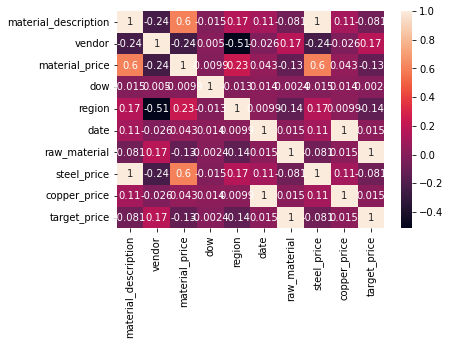

In [15]:
# Create Correlation Matrix

corr_matrix = encoded_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [26]:
# Create bolean target by getting rid of 'about average' values

encoded_df = encoded_df[encoded_df.target_price != 0]
encoded_df.head()

,material_description,vendor,material_price,link,dow,region,date,raw_material,steel_price,copper_price,target_price
1,13,0,98.99,https://www.amazon.com/EMT-Conduit-10-ft-Steel...,2,8,13,1,13,13,1
2,4,15,5.99,https://www.lowes.com/pd/Sigma-Electric-ProCon...,2,1,13,1,4,13,1
3,5,10,4.86,https://www.gordonelectricsupply.com/p/Allied-...,2,0,13,2,5,13,2
4,5,11,7.22,https://www.homedepot.com/p/1-2-in-x-10-ft-Ele...,2,7,13,1,5,13,1
5,16,21,344.99,https://www.southwestlumber.com/shop/electrica...,2,2,13,2,16,13,2


In [27]:
# Define the features set.
X = encoded_df.copy()
X = X.drop(['link', 'target_price'], axis=1)
X.head()

,material_description,vendor,material_price,dow,region,date,raw_material,steel_price,copper_price
1,13,0,98.99,2,8,13,1,13,13
2,4,15,5.99,2,1,13,1,4,13
3,5,10,4.86,2,0,13,2,5,13
4,5,11,7.22,2,7,13,1,5,13
5,16,21,344.99,2,2,13,2,16,13


In [28]:
# Define the target set. 1 = 'high price' and 2 = 'low price'

y = encoded_df['target_price'].values
y[:5]

array([1, 1, 2, 1, 2])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(589, 9)
(197, 9)
(589,)
(197,)


In [30]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
predictions

array([2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1])

In [31]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 2", "Actual 1"], columns=["Predicted 2", "Predicted 1"])

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
cm_df

ValueError: Shape of passed values is (3, 3), indices imply (2, 2)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))